## SMS Spam Prediction Project ##
The file we are using contains a collection of more than 5 thousand SMS phone messages. You can check out the **readme** file for more info.

Let's go ahead and use rstrip() plus a list comprehension to get a list of all the lines of text messages:

In [8]:
import nltk

In [9]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [10]:
msg = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print(len(msg))

5574


A collection of texts is also sometimes called "corpus". Let's print the first ten messages and number them using **enumerate**:

In [11]:

for msg_no,message in enumerate(msg[:10]):
    print(msg_no,message,'\n')



0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

1 ham	Ok lar... Joking wif u oni... 

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

3 ham	U dun say so early hor... U c already then say... 

4 ham	Nah I don't think he goes to usf, he lives around here though 

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv 

6 ham	Even my brother is not like to speak with me. They treat me like aids patent. 

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune 

8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [12]:
msg[1120]

"spam\tBored of speed dating? Try SPEEDCHAT, txt SPEEDCHAT to 80155, if you don't like em txt SWAP and get a new chatter! Chat80155 POBox36504W45WQ 150p/msg rcd 16"

In [13]:
import pandas as pd
msg = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t',names=['Label','message'])
msg.head()

,Label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
msg.describe()

,Label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Let's use **groupby** to use describe by label, this way we can begin to think about the features that separate ham and spam!

In [15]:
msg.groupby('Label').describe()

message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [16]:
msg['length'] = msg['message'].apply(len)
msg.head()

,Label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Data Visualization
Let's visualize this! Let's do the imports:

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

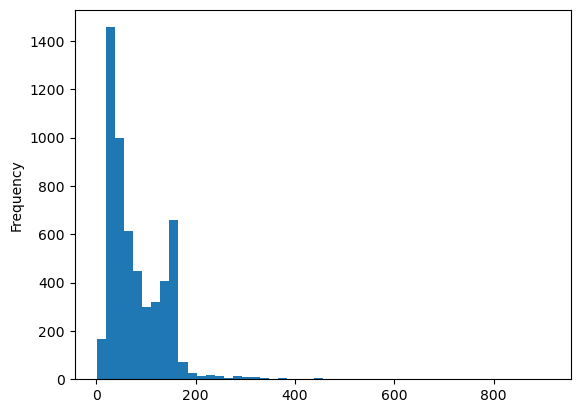

In [18]:
msg['length'].plot(bins=50,kind='hist')
plt.show()

In [19]:
msg['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [20]:
msg[msg['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

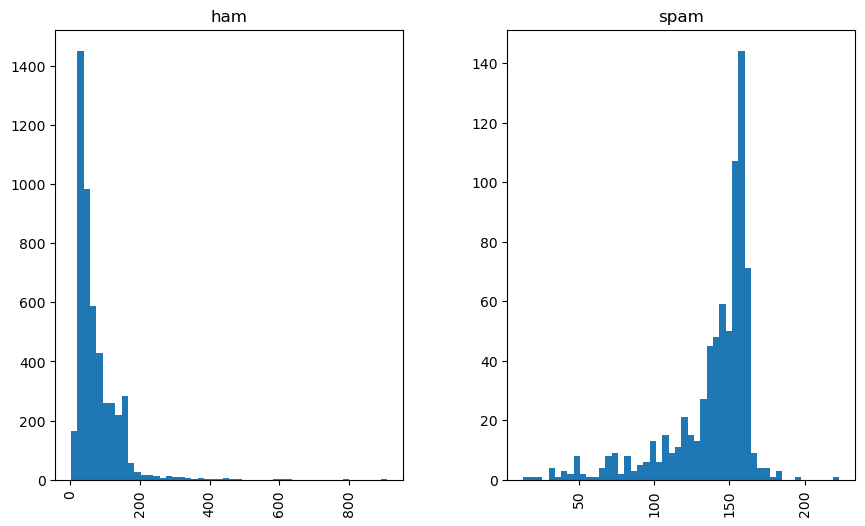

In [21]:
msg.hist(column='length',by='Label',bins=50,figsize=(10,6))
plt.show()

## Text Pre-processing

Our main issue with our data is that it is all in text format (strings). 
    
In this part I'll convert the raw messages (sequence of characters) into vectors (sequences of numbers).

As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..).

Let's create a function that will process the string in the message column, then we can just use **apply()** in pandas do process all the text in the DataFrame.

First removing punctuation. We can just take advantage of Python's built-in **string** library to get a quick list of all the possible punctuation:

In [22]:
import string
sample = 'Sample msg hai.... meon kyun msg padhu?? Hein// wow.'

nopunc =[char for char in sample if char not in string.punctuation]

nopunc = ''.join(nopunc)

from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')[0:10] # Show some stop words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [23]:
nopunc.split()

['Sample', 'msg', 'hai', 'meon', 'kyun', 'msg', 'padhu', 'Hein', 'wow']

In [24]:
# Now just remove any stopwords

clean_msg = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [25]:
clean_msg

['Sample', 'msg', 'hai', 'meon', 'kyun', 'msg', 'padhu', 'Hein', 'wow']

In [26]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [27]:
msg.head()

,Label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
msg['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [29]:
msg.head()

,Label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### Continuing Normalization

There are a lot of ways to continue normalizing this text. Such as [Stemming](https://en.wikipedia.org/wiki/Stemming) or distinguishing by [part of speech](http://www.nltk.org/book/ch05.html).

NLTK has lots of built-in tools and great documentation on a lot of these methods. Sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:
    
    'Nah dawg, IDK! Wut time u headin to da club?'
    
versus

    'No dog, I don't know! What time are you heading to the club?'
    
Some text normalization methods will have trouble with this type of shorthand.

### Vectorization

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

We'll do that in three steps using the bag-of-words model:

1. Count how many times does a word occur in each message (Known as term frequency)

2. Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)

3. Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

Let's begin the first step:

Each vector will have as many dimensions as there are unique words in the SMS corpus.  I will first use SciKit Learn's **CountVectorizer**. This model will convert a collection of text documents to a matrix of token counts.

We can imagine this as a 2-Dimensional matrix. Where the 1-dimension is the entire vocabulary (1 row per word) and the other dimension are the actual documents, in this case a column per text message. 

For example:

<table border = “1“>
<tr>
<th></th> <th>Message 1</th> <th>Message 2</th> <th>...</th> <th>Message N</th> 
</tr>
<tr>
<td><b>Word 1 Count</b></td><td>0</td><td>1</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word 2 Count</b></td><td>0</td><td>0</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>...</b></td> <td>1</td><td>2</td><td>...</td><td>0</td>
</tr>
<tr>
<td><b>Word N Count</b></td> <td>0</td><td>1</td><td>...</td><td>1</td>
</tr>
</table>


Since there are so many messages, we can expect a lot of zero counts for the presence of that word in that document. Because of this, SciKit Learn will output a Sparse Matrix.

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
bow_transf = CountVectorizer(analyzer=text_process).fit(msg['message'])

print(len(bow_transf.vocabulary_))

11425


In [32]:
m4 = msg['message'][3]
print(m4)

U dun say so early hor... U c already then say...


In [33]:
bow_t4 =bow_transf.transform([m4])
print(bow_t4)
print(bow_t4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [34]:
print(bow_transf.get_feature_names_out()[4068])
print(bow_transf.get_feature_names_out()[9554])

U
say


Now I can use **.transform** on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages. Let's go ahead and check out how the bag-of-words counts for the entire SMS corpus is a large, sparse matrix:

In [35]:
msg_bow = bow_transf.transform(msg['message'])

print('SHape of Sparse Matrix: ',msg_bow.shape)
print('Amount of Non-Zero occurences: ', msg_bow.nnz)

SHape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [36]:
sprty = (100.0 * msg_bow.nnz / (msg_bow.shape[0]*msg_bow.shape[1]))
print(round(sprty))

0


In [37]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_trf = TfidfTransformer().fit(msg_bow)
tfidf4 = tfidf_trf.transform(bow_t4)
print(tfidf4)

  (0, 4068)	0.4083258993338407
  (0, 4629)	0.2661980190608719
  (0, 5261)	0.2972995740586873
  (0, 6204)	0.2995379972369742
  (0, 6222)	0.31872168929491496
  (0, 7186)	0.4389365653379858
  (0, 9554)	0.5385626262927565


In [38]:
print(tfidf_trf.idf_[bow_transf.vocabulary_['u']])
print(tfidf_trf.idf_[bow_transf.vocabulary_['university']])

3.2800524267409408
8.527076498901426


In [39]:
msg_tfidf = tfidf_trf.transform(msg_bow)
print(msg_tfidf.shape)

(5572, 11425)


## Training a model

In [40]:
from sklearn.naive_bayes import MultinomialNB
spam_detact_mdl = MultinomialNB().fit(msg_tfidf,msg['Label'])
 

In [41]:
print(spam_detact_mdl.predict(tfidf4)[0])
print('expected:', msg.Label[3])

ham
expected: ham


Fantastic! We've developed a model that can attempt to predict spam vs ham classification!

## Model Evaluation
Now I want to determine how well our model will do overall on the entire dataset. Let's begin by getting all the predictions:

In [42]:
all_pred = spam_detact_mdl.predict(msg_tfidf)
print(all_pred)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [43]:
from sklearn.metrics import classification_report
print (classification_report(msg['Label'], all_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



## Train Test Split

In [44]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(msg['message'], msg['Label'], test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [45]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [46]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000002195B275120>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [47]:
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.98      1001
        spam       0.70      1.00      0.83       114

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115

